## Media Analytics Prediction Project

**Problem Statement**

The goals are how to predict views and search volumes in the future.

### Data Inspection & Data Cleaning

Import required package

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation packages

import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.api as sm 

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the dataset 
import openpyxl
import pandas as pd

wb = openpyxl.load_workbook('Analytics.xlsx')
sheet = wb.worksheets[1]

dat = pd.DataFrame(sheet.values)
dat = dat.rename(columns=dat.iloc[0]).drop([0]).head(93).head(91)
dat = dat.loc[:, :'Twitter pageviews']
dat


,date,spend,Views,Search Volume,Keywords Natrual Traffic,Keywords Natraul Search,Nano Keywords Natrual Traffic,Nano Keywords Natraul Search,Upper Funnel Marketing Cost,YouTube Cost,YouTube Impression,YouTube Pageviews,Facebook Cost,Facebook Impression,Facebook pageviews,FB Prospecting For Purchase Cost,Twitter Cost,Twitter Impression,Twitter pageviews
1,2020-10-02 00:00:00,13421,21711,301380,3763,8832,118,445,13420.7,0.05,38,0,9720.64,1351883,17717,0,3700,1031555,3516
2,2020-10-03 00:00:00,14345,21495,301912,3690,8475,50,298,14344.6,0.62,410,0,10644,1388664,17748,0,3700,846274,3534
3,2020-10-04 00:00:00,16454,23032,316834,3944,8832,66,330,16454,3659.5,609663,982,9096.27,1235405,16047,0,3698.24,781267,3483
4,2020-10-05 00:00:00,24002,24585,318226,4174,9908,60,427,24002.1,11280.6,4316890,4380,9069.1,1241953,13268,0,3652.43,1114016,3353
5,2020-10-06 00:00:00,22620,22886,313264,2970,9818,79,576,22619.7,9803.35,5375037,5086,9125.2,1172521,12017,0,3691.19,1015500,3362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-12-27 00:00:00,63657,33215,410129,4285,11430,134,1048,30967.8,13084.9,2593141,38507,10217.8,1213999,13505,27982.6,7665.1,4476455,8839
88,2020-12-28 00:00:00,60008,33326,394050,4452,11765,145,1174,27467.2,9819.63,1937147,32355,9837.67,1268204,12780,28262.2,7809.88,4424504,8991
89,2020-12-29 00:00:00,55600,31866,368405,4320,11365,144,1108,24197.7,8955.18,1679864,28192,9687.41,1111138,12246,28233.7,5555.07,1982253,6409
90,2020-12-30 00:00:00,53384,29493,343053,3958,10307,128,995,23149.8,8056.09,1401576,25909,9517.32,972703,12366,28213.2,5576.4,2052034,6413


Check the first few rows of the dataset

In [4]:
dat.head()

,date,spend,Views,Search Volume,Keywords Natrual Traffic,Keywords Natraul Search,Nano Keywords Natrual Traffic,Nano Keywords Natraul Search,Upper Funnel Marketing Cost,YouTube Cost,YouTube Impression,YouTube Pageviews,Facebook Cost,Facebook Impression,Facebook pageviews,FB Prospecting For Purchase Cost,Twitter Cost,Twitter Impression,Twitter pageviews
1,2020-10-02 00:00:00,13421,21711,301380,3763,8832,118,445,13420.7,0.05,38,0,9720.64,1351883,17717,0,3700,1031555,3516
2,2020-10-03 00:00:00,14345,21495,301912,3690,8475,50,298,14344.6,0.62,410,0,10644,1388664,17748,0,3700,846274,3534
3,2020-10-04 00:00:00,16454,23032,316834,3944,8832,66,330,16454,3659.5,609663,982,9096.27,1235405,16047,0,3698.24,781267,3483
4,2020-10-05 00:00:00,24002,24585,318226,4174,9908,60,427,24002.1,11280.6,4316890,4380,9069.1,1241953,13268,0,3652.43,1114016,3353
5,2020-10-06 00:00:00,22620,22886,313264,2970,9818,79,576,22619.7,9803.35,5375037,5086,9125.2,1172521,12017,0,3691.19,1015500,3362


Check the last few row of the dataset

In [5]:
dat.tail()

,date,spend,Views,Search Volume,Keywords Natrual Traffic,Keywords Natraul Search,Nano Keywords Natrual Traffic,Nano Keywords Natraul Search,Upper Funnel Marketing Cost,YouTube Cost,YouTube Impression,YouTube Pageviews,Facebook Cost,Facebook Impression,Facebook pageviews,FB Prospecting For Purchase Cost,Twitter Cost,Twitter Impression,Twitter pageviews
87,2020-12-27 00:00:00,63657,33215,410129,4285,11430,134,1048,30967.8,13084.9,2593141,38507,10217.8,1213999,13505,27982.6,7665.1,4476455,8839
88,2020-12-28 00:00:00,60008,33326,394050,4452,11765,145,1174,27467.2,9819.63,1937147,32355,9837.67,1268204,12780,28262.2,7809.88,4424504,8991
89,2020-12-29 00:00:00,55600,31866,368405,4320,11365,144,1108,24197.7,8955.18,1679864,28192,9687.41,1111138,12246,28233.7,5555.07,1982253,6409
90,2020-12-30 00:00:00,53384,29493,343053,3958,10307,128,995,23149.8,8056.09,1401576,25909,9517.32,972703,12366,28213.2,5576.4,2052034,6413
91,2020-12-31 00:00:00,52051,24240,291548,3099,8708,106,903,21910.9,6347.09,1168726,20641,9163.79,1094827,12430,27599.8,6400,2526062,7630


Explore the data

In [6]:
dat.shape

(91, 19)

There are 91 rows. There are 19 columns.


In [7]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 1 to 91
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   date                              91 non-null     object
 1   spend                             91 non-null     object
 2   Views                             91 non-null     object
 3   Search Volume                     91 non-null     object
 4   Keywords Natrual Traffic          91 non-null     object
 5   Keywords Natraul Search           91 non-null     object
 6   Nano Keywords Natrual Traffic     91 non-null     object
 7   Nano Keywords Natraul Search      91 non-null     object
 8   Upper Funnel Marketing Cost       91 non-null     object
 9   YouTube Cost                      91 non-null     object
 10  YouTube Impression                91 non-null     object
 11  YouTube Pageviews                 91 non-null     object
 12  Facebook Cost           

In [8]:
# Change the type of the columns
# Drop the date column because it is not useful for the prediction
dat = dat.iloc[:, 1:].astype('int64')

In [9]:
dat.describe()

,spend,Views,Search Volume,Keywords Natrual Traffic,Keywords Natraul Search,Nano Keywords Natrual Traffic,Nano Keywords Natraul Search,Upper Funnel Marketing Cost,YouTube Cost,YouTube Impression,YouTube Pageviews,Facebook Cost,Facebook Impression,Facebook pageviews,FB Prospecting For Purchase Cost,Twitter Cost,Twitter Impression,Twitter pageviews
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,9.100000e+01,91.000000
mean,50073.208791,28992.395604,368472.406593,4633.791209,12522.054945,219.417582,1491.120879,35826.758242,11707.879121,2.509655e+06,16827.450549,17669.230769,1.936818e+06,16942.285714,12661.010989,6448.725275,2.228294e+06,7160.714286
std,24696.167019,5009.914426,39281.402763,1298.694272,2553.828774,164.458240,881.970128,23160.101281,10835.811001,2.548955e+06,11979.965426,12294.158658,1.294661e+06,10024.108179,9419.456144,3809.295788,1.343027e+06,4019.037439
min,281.000000,20200.000000,291548.000000,2569.000000,8475.000000,39.000000,263.000000,281.000000,0.000000,3.800000e+01,0.000000,92.000000,1.444100e+04,342.000000,0.000000,99.000000,3.149600e+04,187.000000
25%,30321.500000,25325.000000,350852.500000,3891.000000,11065.000000,125.500000,989.500000,19857.000000,4952.500000,8.440435e+05,6083.000000,9370.500000,1.047952e+06,10358.500000,2545.000000,3667.500000,1.080438e+06,3575.500000
50%,47056.000000,28552.000000,364414.000000,4478.000000,12181.000000,171.000000,1387.000000,24197.000000,6778.000000,1.831764e+06,16171.000000,10235.000000,1.268204e+06,12212.000000,13191.000000,5576.000000,1.884961e+06,6816.000000
75%,71382.500000,31679.500000,389594.000000,5092.500000,13812.000000,273.000000,1903.500000,52223.500000,14514.500000,3.511936e+06,26646.500000,27660.000000,2.988021e+06,23749.500000,19907.000000,9030.000000,3.251280e+06,9471.500000
max,97283.000000,47691.000000,502217.000000,10235.000000,21994.000000,1223.000000,6222.000000,97283.000000,35537.000000,1.551021e+07,42285.000000,46836.000000,6.137848e+06,44559.000000,28376.000000,15589.000000,6.267401e+06,18524.000000


In [10]:
# Function to create dataframe that does not contain the outliers for the given dataframe 
# and column. Also, visualize the boxplot of that variable
def outlier(df, colname):
    plt.boxplot(df[colname])
    plt.title("Boxplot of Sale Price")
    plt.ylabel("Sale Price")
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[colname] >= Q1 - 1.5*IQR) & (df[colname] <= Q3 + 1.5*IQR)]
    return df

### Exploratory Data Analytics

**Understanding the data**
1. Identify multicollinearity

2. Identify if some predictors directly have a strong association with the response variable (SalePrice)

**Visualising Numeric Variables**

If including a pairplot of all the numeric variables, there will be a plot containing 19 x 19 figures. It tooks a long time to run and it is hard to visualize as well. Thus, I am going to obtain the correlation matrix, and for highly correlated variables, plot a scatter plot to visualize the relation.


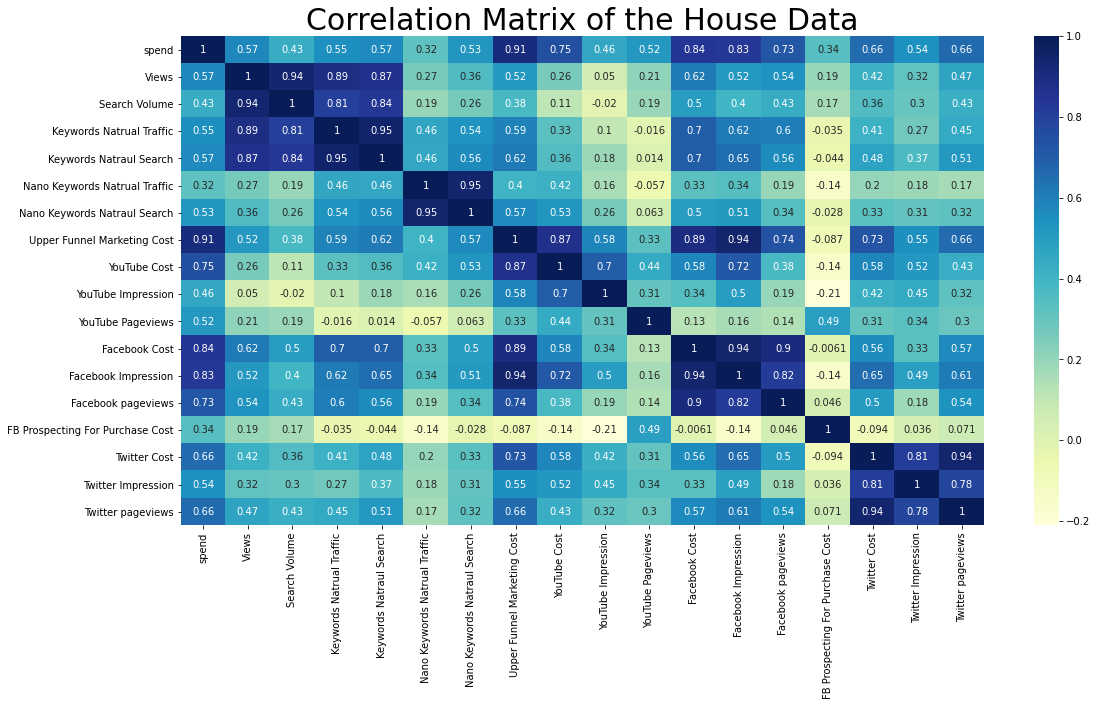

In [11]:
# correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18, 9))
sns.heatmap(dat.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Matrix of the House Data", fontsize = 30)
plt.show()

Figure out what variable has high correlation with Views, which means that the absolute value of the correlation coefficient between this variable and SalePrice is larger than or equal to 0.5 

In [12]:
dat.corr().loc['Views', :][abs(dat.corr().loc['Views', :]) >= 0.5]


spend                          0.574096
Views                          1.000000
Search Volume                  0.937289
Keywords Natrual Traffic       0.889477
Keywords Natraul Search        0.870638
Upper Funnel Marketing Cost    0.516765
Facebook Cost                  0.615457
Facebook Impression            0.515761
Facebook pageviews             0.536395
Name: Views, dtype: float64

The variable listed above except Views and Search Volume might be the important factors that drive the Views.

Figure out what variable has high correlation with Search Volume, which means that the absolute value of the correlation coefficient between this variable and SalePrice is larger than or equal to 0.5

In [13]:
dat.corr().loc['Search Volume', :][abs(dat.corr().loc['Search Volume', :]) >= 0.5]

Views                       0.937289
Search Volume               1.000000
Keywords Natrual Traffic    0.805232
Keywords Natraul Search     0.835997
Name: Search Volume, dtype: float64

The variable listed above except Views and Seatch Volume might be the important factors that drive the Search Volume.

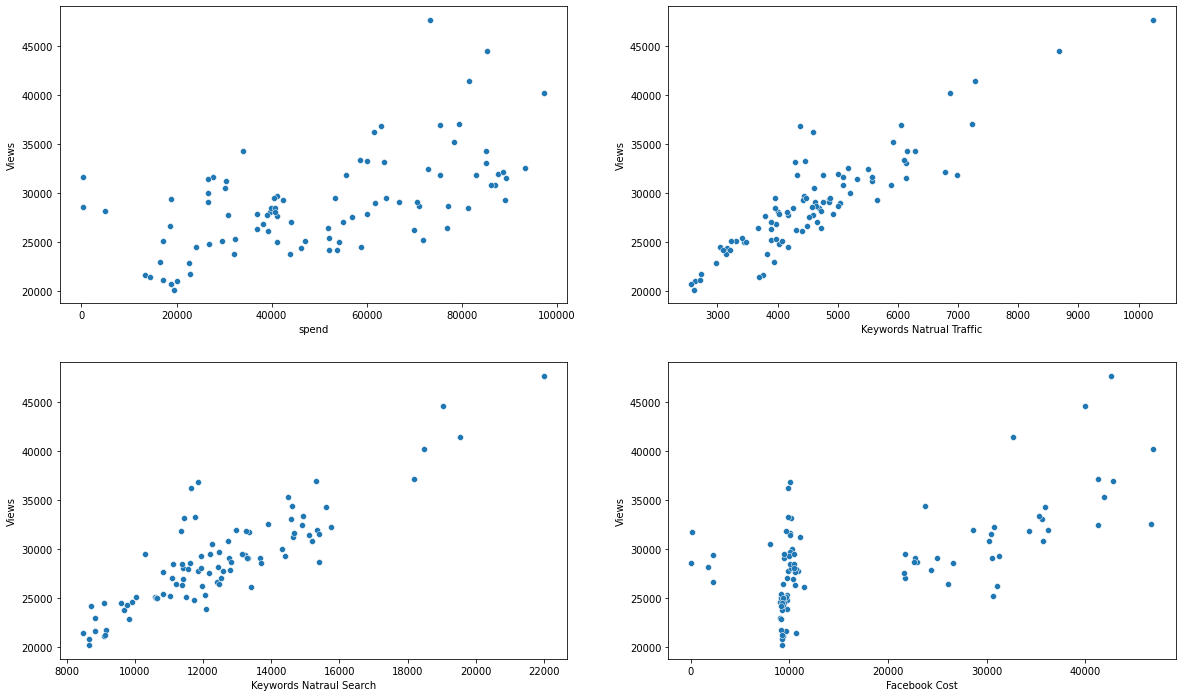

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.scatterplot(data=dat, x="spend", y="Views")
plt.subplot(2,2,2)
sns.scatterplot(data=dat, x="Keywords Natrual Traffic", y="Views")
plt.subplot(2,2,3)
sns.scatterplot(data=dat, x="Keywords Natraul Search", y="Views")
plt.subplot(2,2,4)
sns.scatterplot(data=dat, x="Facebook Cost", y="Views")
plt.show()

I only plotted a few plots of the variables that are highly correlated with Views. However, these plots amplify that these variables are highly correlated with Views.

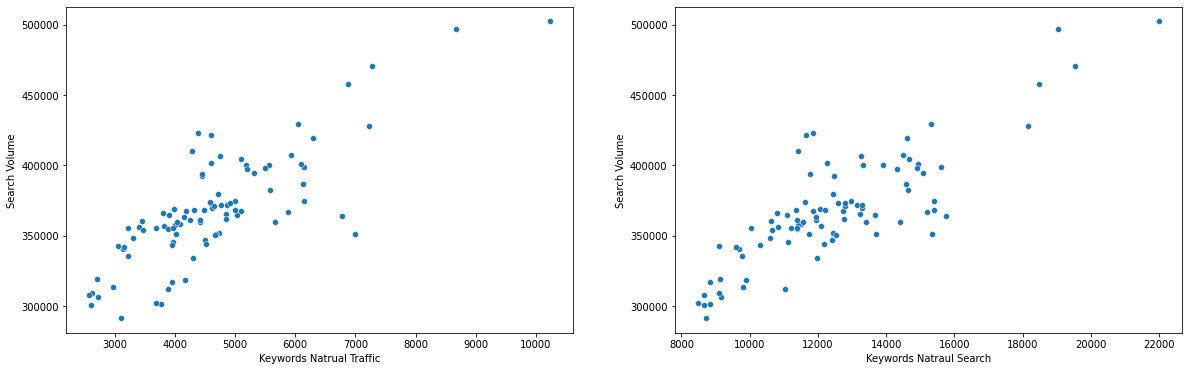

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.scatterplot(data=dat, x="Keywords Natrual Traffic", y="Search Volume")
plt.subplot(1,2,2)
sns.scatterplot(data=dat, x="Keywords Natraul Search", y="Search Volume")
plt.show()

These plots amplify that these variables are highly correlated with Search Volume.

### Model Building

**Train and Test Split**

In [16]:
from sklearn.model_selection import train_test_split

# Specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dat, train_size = 0.7, test_size = 0.3, random_state = 100)

**Standardize the numeric variables**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
val = scaler.fit_transform(df_train)
df_train = pd.DataFrame(val, index=df_train.index, columns=df_train.columns)

**Dividing into X and Y sets for the model building**

In [18]:
y_train_views = df_train.pop('Views')
y_train_searchvolume = df_train.pop('Search Volume')
X_train = df_train

In [19]:
val = scaler.fit_transform(df_test)
df_test = pd.DataFrame(val, index=df_test.index, columns=df_test.columns)
y_test_views = df_test.pop('Views')
y_test_searchvolume = df_test.pop('Search Volume')
X_test = df_test

## Model For Search Volume

### Model 1

**Visualizing the Features Importance For Views**

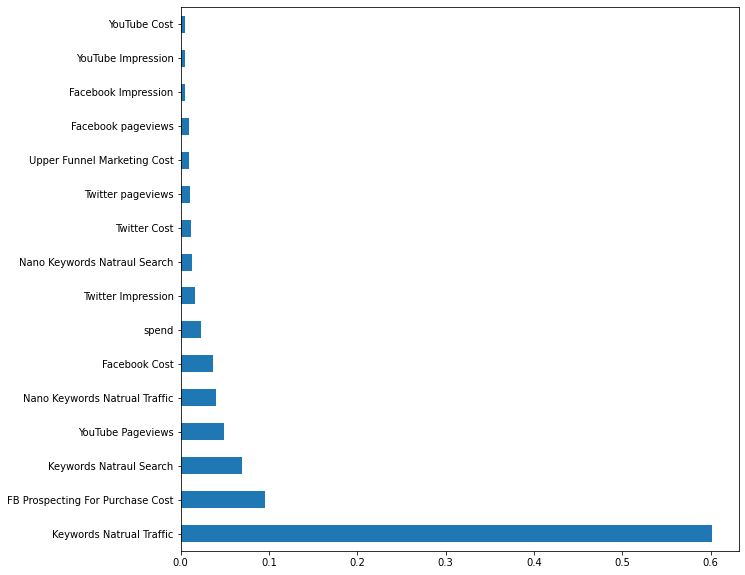

In [20]:
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train_views)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(17).plot(kind='barh',figsize=(10,10));

In [21]:
views_feature = feat_importances.nlargest(6).index
X_train_views = X_train[views_feature]
mdl_views = sm.OLS(y_train_views, X_train_views).fit()
print(mdl_views.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Views   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              318.1
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                    6.42e-42
Time:                        16:59:23   Log-Likelihood:                          79.313
No. Observations:                  63   AIC:                                     -146.6
Df Residuals:                      57   BIC:                                     -133.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

### Model 2

**Cross Validation and Recursive Feature Elimination**

Use cross validation and recursive feature elimination to select best number of features and the features 

In [22]:
from sklearn.model_selection import KFold
from sklearn.base import clone

# Calculates RMSE from actual and predicted values
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train_views)

# Get the root mean squared error respect to the number of features
err = []
for i in range(1, 18):
    rfe = RFE(lm, i)             
    err = np.append(err, cross_validate_rmse(rfe, X_train, y_train_views))
err
    

array([0.17158424, 0.16319357, 0.16322635, 0.16034721, 0.10034021,
       0.08986101, 0.09031881, 0.10857484, 0.11098791, 0.11695821,
       0.11817712, 0.11863741, 0.11824765, 0.1193206 , 0.11492422,
       0.11563426, 0.11563426])

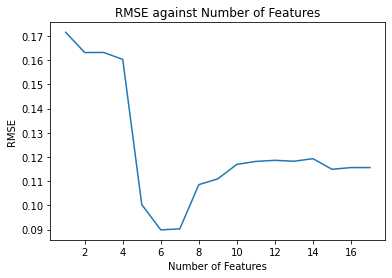

In [24]:
plt.plot(range(1, 18), err)
plt.xlabel("Number of Features")
plt.ylabel("RMSE")
plt.title("RMSE against Number of Features");

In [25]:
temp = list(err[0:])
best_number = temp.index(min(temp)) + 1
best_number

6

6 is the optimal number of features for the regression because it has the smallest cross vaildation error.

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train_views)
rfe1 = RFE(lm, best_number)            
rfe1 = rfe1.fit(X_train, y_train_views)
col = X_train.columns[rfe1.support_]
col

Index(['spend', 'Keywords Natrual Traffic', 'Upper Funnel Marketing Cost',
       'YouTube Cost', 'Facebook Cost', 'Twitter Cost'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [27]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [28]:
# Adding a constant variable   
X_train_rfe = sm.add_constant(X_train_rfe)

# Run the linear model
lm2 = sm.OLS(y_train_views,X_train_rfe).fit()  

Get the summary table

In [29]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     49.09
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.55e-20
Time:                        16:59:24   Log-Likelihood:                 74.430
No. Observations:                  63   AIC:                            -134.9
Df Residuals:                      56   BIC:                            -119.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### From the summary tables above, the first model is better because it obtains a higher adjusted $R^2$ and all the independent variables are significant away from 0 at 5% level of confidence.

**Residual Analysis for the Train Data**

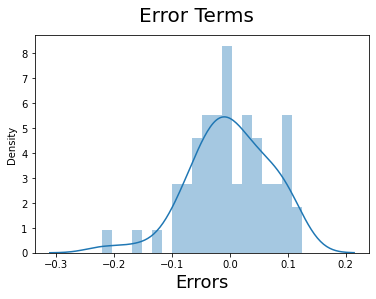

In [30]:
y_pred_views = mdl_views.predict(X_train[views_feature])

# res is the residual
res = (y_pred_views - y_train_views)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18);   

In [31]:
# Mean of the residuals
np.mean(res)

0.00032492547364093436

In [32]:
# Standard Deviation of the residuals
np.std(res)

0.06870841374430234

From the histogram and the data above, the error terms are mean zero.

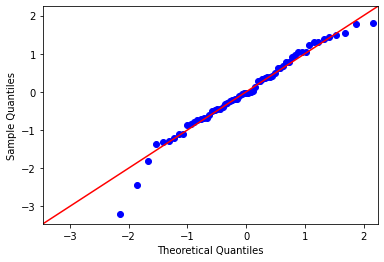

In [33]:
# Plot Q-Q plot
sm.qqplot((res - np.mean(res))/np.std(res), line ='45');

Most of the points follow the line.

### Model Evaluation

In [34]:
X_test_views = X_test[views_feature]

Use model to make prediction

In [35]:
# Making predictions
y_pred = mdl_views.predict(X_test_views)

In [36]:
# Root Mean Squared Error for Test Data
rmse(y_test_views, y_pred)

0.07562648830455576

In [37]:
from sklearn.metrics import r2_score 
r2_score(y_test_views, y_pred)

0.8829661670923687

## Model For Search Volume

### Model 1

**Visualizing the Features Importance For Search Volume**

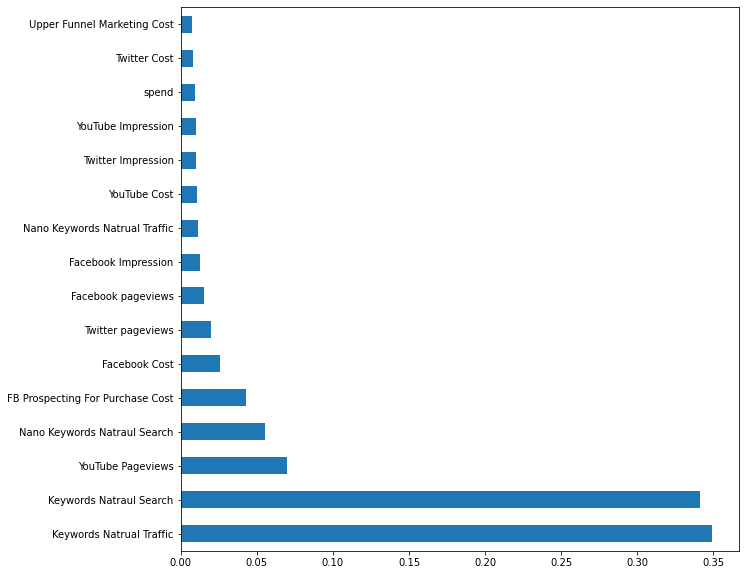

In [38]:
# Building Random Forest model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train_searchvolume)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(17).plot(kind='barh',figsize=(10,10));

In [39]:
searchvolume_feature = feat_importances.nlargest(6).index
X_train_searchvolume = X_train[views_feature]
mdl_searchvolume = sm.OLS(y_train_searchvolume, X_train_searchvolume).fit()
print(mdl_searchvolume.summary())

                                 OLS Regression Results                                
Dep. Variable:          Search Volume   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              232.0
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                    3.74e-38
Time:                        16:59:24   Log-Likelihood:                          67.763
No. Observations:                  63   AIC:                                     -123.5
Df Residuals:                      57   BIC:                                     -110.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

### Model 2 
**Cross Validation and Recursive Feature Elimination**

Use cross validation and recursive feature elimination to select best number of features and the features 

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train_searchvolume)

# Get the root mean squared error respect to the number of features
err = []
for i in range(1, 18):
    rfe = RFE(lm, i)             
    err = np.append(err, cross_validate_rmse(rfe, X_train, y_train_searchvolume))
err
    

array([0.17001812, 0.15830966, 0.15813563, 0.15348322, 0.12508492,
       0.09687535, 0.10921912, 0.11984053, 0.12513596, 0.12319685,
       0.12567037, 0.1211502 , 0.12229632, 0.11334383, 0.10985885,
       0.10777569, 0.10777569])

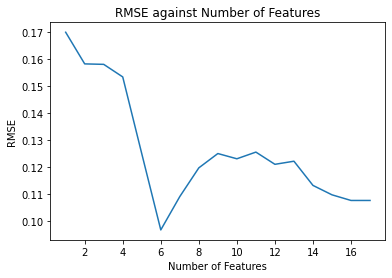

In [41]:
plt.plot(range(1, 18), err)
plt.xlabel("Number of Features")
plt.ylabel("RMSE")
plt.title("RMSE against Number of Features");

In [42]:
temp = list(err[0:])
best_number = temp.index(min(temp)) + 1
best_number

6

6 is the optimal number of features for the regression because it has the smallest cross vaildation error.

In [43]:
lm = LinearRegression()
lm.fit(X_train, y_train_searchvolume)
rfe1 = RFE(lm, best_number)            
rfe1 = rfe1.fit(X_train, y_train_searchvolume)
col = X_train.columns[rfe1.support_]
col

Index(['spend', 'Keywords Natraul Search', 'Upper Funnel Marketing Cost',
       'YouTube Cost', 'Facebook Cost', 'Twitter Cost'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Run the linear model
lm2 = sm.OLS(y_train_searchvolume,X_train_rfe).fit()  

Get the summary table

In [46]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          Search Volume   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     27.87
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           3.82e-15
Time:                        16:59:25   Log-Likelihood:                 64.128
No. Observations:                  63   AIC:                            -114.3
Df Residuals:                      56   BIC:                            -99.25
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### From the summary tables above, the first model is better because it obtains a higher adjusted $R^2$ and all the independent variables are significant away from 0 at 5% level of confidence.

**Residual Analysis for the Train Data**

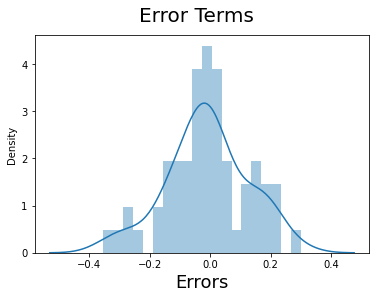

In [47]:
y_pred_searchvolume = mdl_searchvolume.predict(X_train[searchvolume_feature])

# res is the residual
res = (y_pred_searchvolume - y_train_searchvolume)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18);   

In [48]:
# Mean of the residuals
np.mean(res)

-0.009684916017684364

In [49]:
# Standard Deviation of the residuals
np.std(res)

0.1340908848473318

From the histogram and the data above, the error terms are mean zero.

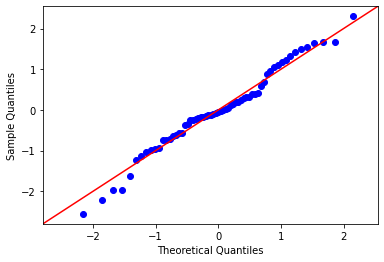

In [50]:
# Plot Q-Q plot
sm.qqplot((res - np.mean(res))/np.std(res), line ='45');

Most of the points follow the line.

There is no clear pattern between predicted sale price and residual.

### Model Evaluation

In [51]:
X_test_searchvolume = X_test[searchvolume_feature]

Use model to make prediction

In [52]:
# Making predictions
y_pred = mdl_searchvolume.predict(X_test_searchvolume)

In [53]:
# Root Mean Squared Error for Test Data
rmse(y_test_searchvolume, y_pred)

0.1738732938544779

In [54]:
from sklearn.metrics import r2_score 
r2_score(y_test_searchvolume, y_pred)

0.4363918900113427